# **Project Overview: Bicycle Sales & Employee Analysis**

### **Objective:**
The primary goal of the **Bicycle Sales & Employee Analysis** project is to develop a comprehensive data analysis pipeline to understand key metrics related to bicycle sales, employee performance, and customer behavior. This project aims to build a streamlined end-to-end solution for extracting, transforming, loading (ETL), analyzing, and visualizing the data while leveraging machine learning (ML) models and large language models (LLM) to generate deeper insights.

---

### **Key Components & Tools:**

- **PySpark (ETL Tool):**  
  Used to extract data from Snowflake, transform it, and load it into a PostgreSQL data warehouse. PySpark enables handling large datasets efficiently during ETL operations.

- **Snowflake (Database):**  
  Snowflake is the primary database for raw data storage, including detailed records of orders, products, customers, staff, and stock levels.

- **PostgreSQL (Data Warehouse):**  
  PostgreSQL serves as the central repository for curated, query-ready data marts, which are optimized for analytics and reporting.

- **Sklearn (Machine Learning):**  
  Sklearn is used to build machine learning models for predicting customer behavior, forecasting sales trends, and analyzing staff performance.

- **Power BI (Data Visualization):**  
  Power BI visualizes key data insights in the form of interactive dashboards that display metrics such as sales performance, employee efficiency, stock levels, and customer purchase patterns.

- **Google Gemini (LLM for Analysis):**  
  Google Gemini is integrated to provide advanced natural language insights based on the visualizations. Users can ask questions about the dashboards, and Gemini will interpret the visual data and provide detailed answers.

---

### **Data Flow:**

1. **Extract (Snowflake) → Transform & Load (PostgreSQL):**  
   PySpark is used to extract raw data from Snowflake, transform it using SQL queries, and load it into PostgreSQL as curated data marts.

2. **Machine Learning Analysis (Sklearn):**  
   Key datasets such as customer purchases and staff performance are fed into Sklearn to develop predictive models.

3. **Visualization (Power BI):**  
   Data from PostgreSQL is visualized through interactive dashboards in Power BI, displaying key metrics like total sales, stock levels, and employee productivity.

4. **Natural Language Querying (Google Gemini):**  
   Google Gemini analyzes the visualizations, allowing users to query Power BI dashboards using natural language and receive detailed insights.

---

### **ETL Queries in the Project:**

- **Orders with Product and Category Name:**  
   Provides details on orders, including product names and categories.

- **Staff Performance:**  
   Evaluates staff productivity based on the number of processed orders and total sales generated by each employee.

- **Customer Purchase Analysis:**  
   Aggregates customer purchases to analyze total orders and spending behavior.

- **Stock Levels Across Stores:**  
   Tracks stock levels of products across different stores to ensure inventory optimization.

---

### **Key Deliverables:**

- **Data Marts in PostgreSQL:**  
   Transformed and query-ready datasets for further analysis.

- **Power BI Dashboards:**  
   Visual representations of key performance metrics, enabling stakeholders to track sales, staff performance, and customer behavior.

- **Machine Learning Models:**  
   Predictive models to analyze customer churn, sales trends, and staff performance.

- **LLM Integration:**  
   An interactive tool powered by Google Gemini that allows users to ask questions and analyze Power BI visualizations in natural language.

---

### **Conclusion:**

This project integrates various tools to automate and enhance the analysis of bicycle sales and employee performance. From ETL and machine learning to visualization and natural language analysis, it provides a robust framework for understanding critical business data and generating actionable insights for decision-making.


## ERD Diagram

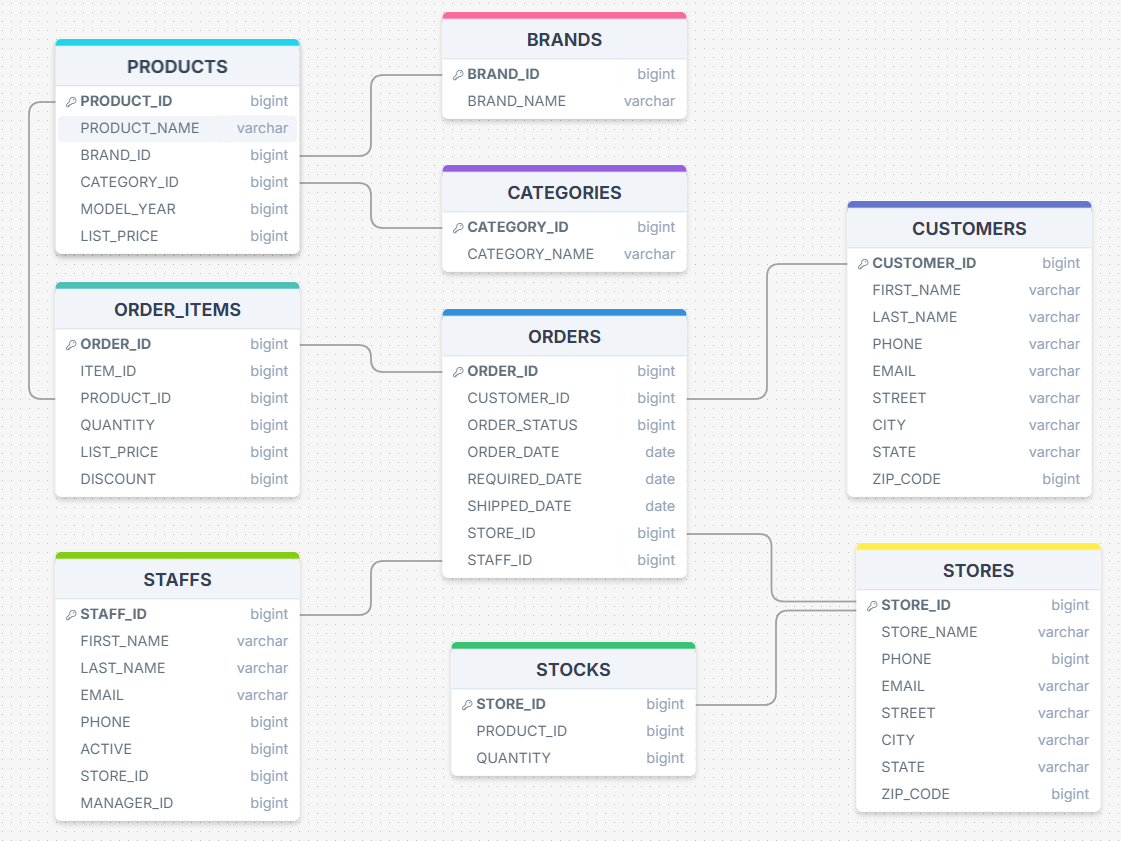

## Project Workflow

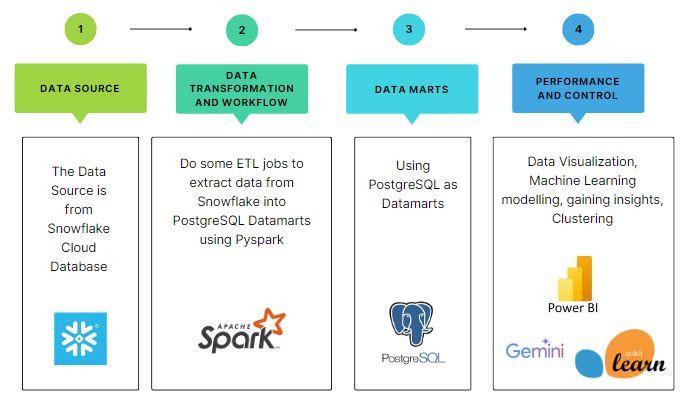

## Pyspark Code for ETL Process

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.utils import AnalysisException

# Initialize SparkSession with Snowflake and PostgreSQL JDBC drivers
spark = SparkSession.builder \
    .appName("SnowflakeToDataMart") \
    .config("spark.jars", "C:\\Users\\Michael\\Pyspark\\snowflake-jdbc-3.13.30.jar,C:\\Users\\Michael\\Pyspark\\spark-snowflake_2.12-2.13.0-spark_3.4.jar,C:\\Users\\Michael\\Pyspark\\postgresql-42.7.3.jar") \
    .getOrCreate()

# Snowflake connection options
sfOptions = {
    "sfURL": "https://ar37313.europe-west4.gcp.snowflakecomputing.com",
    "sfAccount": "ar37313.europe-west4.gcp",
    "sfUser": "MAGICDASH",
    "sfPassword": "*****************************",
    "sfDatabase": "BICYCLE",
    "sfSchema": "PUBLIC",
    "sfWarehouse": "COMPUTE_WH",
    "sfRole": "ACCOUNTADMIN"
}

# PostgreSQL connection options
jdbc_driver_path = "C:\\Users\\Michael\\Pyspark\\postgresql-42.7.3.jar"
jdbc_url = "jdbc:postgresql://localhost:5432/project3"
connection_properties = {
    "user": "postgres",
    "password": "**************************************",
    "driver": "org.postgresql.Driver"
}

# Snowflake source name for Spark
SNOWFLAKE_SOURCE_NAME = "net.snowflake.spark.snowflake"

# Function to load data from Snowflake and save it to PostgreSQL
def load_and_save_data(query, table_name):
    try:
        # Load data from Snowflake using the provided SQL query
        df = spark.read.format(SNOWFLAKE_SOURCE_NAME) \
            .options(**sfOptions) \
            .option("query", query) \
            .load()

        # Write data to PostgreSQL
        df.write.jdbc(url=jdbc_url, table=table_name, mode="overwrite", properties=connection_properties)

        print(f"Data successfully written to {table_name}")
    except AnalysisException as e:
        print(f"Error: {str(e)}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# SQL Queries
# 1. Orders with Product Name and Category Name
orders_with_products_query = """
SELECT o.ORDER_ID, o.ORDER_STATUS, o.ORDER_DATE, o.REQUIRED_DATE, o.SHIPPED_DATE,
       p.PRODUCT_NAME, c.CATEGORY_NAME, oi.QUANTITY, oi.LIST_PRICE, oi.DISCOUNT
FROM ORDERS o
JOIN ORDER_ITEMS oi ON o.ORDER_ID = oi.ORDER_ID
JOIN PRODUCTS p ON oi.PRODUCT_ID = p.PRODUCT_ID
JOIN CATEGORIES c ON p.CATEGORY_ID = c.CATEGORY_ID
"""

# 2. Staff Performance based on Orders Processed
staff_performance_query = """
SELECT s.STAFF_ID, s.FIRST_NAME, s.LAST_NAME, COUNT(o.ORDER_ID) AS ORDERS_PROCESSED,
       SUM(oi.QUANTITY * oi.LIST_PRICE) AS TOTAL_SALES
FROM STAFFS s
JOIN ORDERS o ON s.STAFF_ID = o.STAFF_ID
JOIN ORDER_ITEMS oi ON o.ORDER_ID = oi.ORDER_ID
GROUP BY s.STAFF_ID, s.FIRST_NAME, s.LAST_NAME
ORDER BY TOTAL_SALES DESC
"""

# 3. Customer Purchase Analysis
customer_analysis_query = """
SELECT c.CUSTOMER_ID, c.FIRST_NAME, c.LAST_NAME, COUNT(o.ORDER_ID) AS TOTAL_ORDERS,
       SUM(oi.QUANTITY * oi.LIST_PRICE - oi.DISCOUNT) AS TOTAL_SPENT
FROM CUSTOMERS c
JOIN ORDERS o ON c.CUSTOMER_ID = o.CUSTOMER_ID
JOIN ORDER_ITEMS oi ON o.ORDER_ID = oi.ORDER_ID
GROUP BY c.CUSTOMER_ID, c.FIRST_NAME, c.LAST_NAME
ORDER BY TOTAL_SPENT DESC
"""

# 4. Stock Levels Across Stores
stock_levels_query = """
SELECT s.STORE_NAME, p.PRODUCT_NAME, st.QUANTITY
FROM STORES s
JOIN STOCKS st ON s.STORE_ID = st.STORE_ID
JOIN PRODUCTS p ON st.PRODUCT_ID = p.PRODUCT_ID
ORDER BY s.STORE_NAME, p.PRODUCT_NAME
"""

# Load data from Snowflake and save it to PostgreSQL
load_and_save_data(orders_with_products_query, "orders_with_products")
load_and_save_data(staff_performance_query, "staff_performance")
load_and_save_data(customer_analysis_query, "customer_analysis")
load_and_save_data(stock_levels_query, "stock_levels")

# Stop the Spark session
spark.stop()

## Some Example result on PostgreSQL Datawarehouse

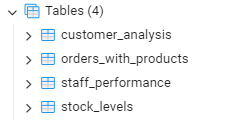

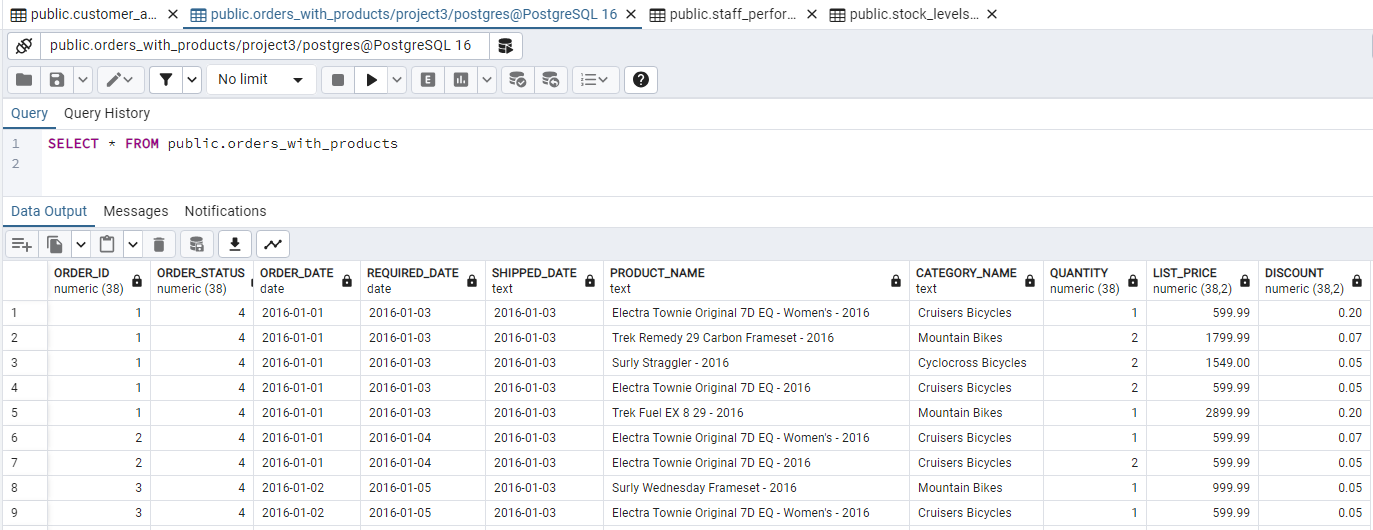

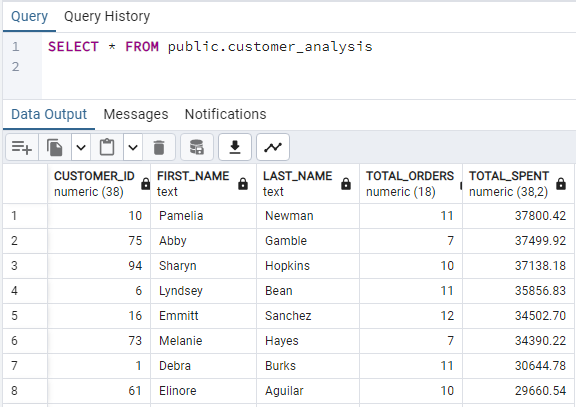

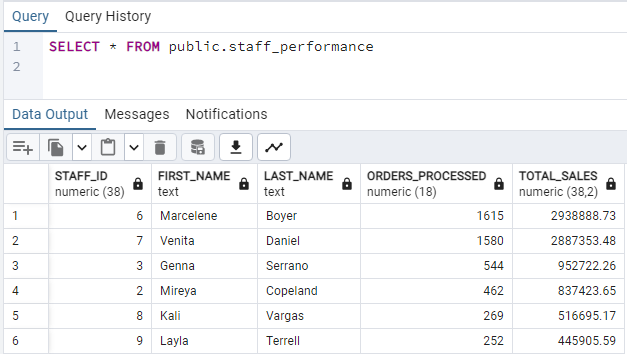

## Connect to PostgreSQL Datamart with Psycopg

In [ ]:
import pandas as pd
import psycopg2
from psycopg2 import OperationalError

try:
    # Attempt to establish a connection to PostgreSQL
    connection = psycopg2.connect(
        host="localhost",
        dbname="project3",
        user="postgres",
        password="permataputihg101",
        port="5432"
    )
    print("Connection Success")

except OperationalError as e:
    print("Connection Failed")
    print(f"Error details: {e}")

Connection Success


## Bicycle Order Analysis

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [ ]:
query = "SELECT * FROM public.orders_with_products"
df = pd.read_sql_query(query, connection)
df.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_33820\2449107542.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,ORDER_ID,ORDER_STATUS,ORDER_DATE,REQUIRED_DATE,SHIPPED_DATE,PRODUCT_NAME,CATEGORY_NAME,QUANTITY,LIST_PRICE,DISCOUNT
0,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,1.0,599.99,0.20
1,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,2.0,1799.99,0.07
2,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Surly Straggler - 2016,Cyclocross Bicycles,2.0,1549.00,0.05
3,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,2.0,599.99,0.05
4,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Trek Fuel EX 8 29 - 2016,Mountain Bikes,1.0,2899.99,0.20


In [ ]:
# Drop all of the null value rows on SHIPPED_DATE, ORDER_DATE, and REQUIRED_DATE
df = df.dropna(subset=['ORDER_DATE', 'REQUIRED_DATE', 'SHIPPED_DATE'])

In [ ]:
# Convert the date columns to datetime format, coercing errors to NaT for invalid dates
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'], errors='coerce')
df['REQUIRED_DATE'] = pd.to_datetime(df['REQUIRED_DATE'], errors='coerce')
df['SHIPPED_DATE'] = pd.to_datetime(df['SHIPPED_DATE'], errors='coerce')

# Calculate Order Processing Time
df['PROCESSING_TIME'] = df['SHIPPED_DATE'] - df['ORDER_DATE']

# Calculate Shipping Delay
df['SHIPPING_DELAY'] = df['SHIPPED_DATE'] - df['REQUIRED_DATE']
df['IS_DELAYED'] = df['SHIPPING_DELAY'].apply(lambda x: x.days > 0)

In [ ]:
df.head(20)

,ORDER_ID,ORDER_STATUS,ORDER_DATE,REQUIRED_DATE,SHIPPED_DATE,PRODUCT_NAME,CATEGORY_NAME,QUANTITY,LIST_PRICE,DISCOUNT,PROCESSING_TIME,SHIPPING_DELAY,IS_DELAYED
0,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,1.0,599.99,0.20,2 days,0 days,False
1,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,2.0,1799.99,0.07,2 days,0 days,False
2,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Surly Straggler - 2016,Cyclocross Bicycles,2.0,1549.00,0.05,2 days,0 days,False
3,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,2.0,599.99,0.05,2 days,0 days,False
4,1.0,4.0,2016-01-01,2016-01-03,2016-01-03,Trek Fuel EX 8 29 - 2016,Mountain Bikes,1.0,2899.99,0.20,2 days,0 days,False
5,2.0,4.0,2016-01-01,2016-01-04,2016-01-03,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,1.0,599.99,0.07,2 days,-1 days,False
6,2.0,4.0,2016-01-01,2016-01-04,2016-01-03,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,2.0,599.99,0.05,2 days,-1 days,False
7,3.0,4.0,2016-01-02,2016-01-05,2016-01-03,Surly Wednesday Frameset - 2016,Mountain Bikes,1.0,999.99,0.05,1 days,-2 days,False
8,3.0,4.0,2016-01-02,2016-01-05,2016-01-03,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,1.0,599.99,0.05,1 days,-2 days,False
9,4.0,4.0,2016-01-03,2016-01-04,2016-01-05,Ritchey Timberwolf Frameset - 2016,Mountain Bikes,2.0,749.99,0.10,2 days,1 days,True


In [ ]:
df.drop(columns=['REQUIRED_DATE', 'SHIPPED_DATE', 'PRODUCT_NAME', 'ORDER_ID', 'ORDER_STATUS'], inplace=True)
df.head()

,ORDER_DATE,CATEGORY_NAME,QUANTITY,LIST_PRICE,DISCOUNT,PROCESSING_TIME,SHIPPING_DELAY,IS_DELAYED
0,2016-01-01,Cruisers Bicycles,1.0,599.99,0.20,2 days,0 days,False
1,2016-01-01,Mountain Bikes,2.0,1799.99,0.07,2 days,0 days,False
2,2016-01-01,Cyclocross Bicycles,2.0,1549.00,0.05,2 days,0 days,False
3,2016-01-01,Cruisers Bicycles,2.0,599.99,0.05,2 days,0 days,False
4,2016-01-01,Mountain Bikes,1.0,2899.99,0.20,2 days,0 days,False


In [ ]:
# Calculate Final Price
df['FINAL_PRICE'] = df['LIST_PRICE'] * df['QUANTITY'] * df['DISCOUNT']
df.head()

,ORDER_DATE,CATEGORY_NAME,QUANTITY,LIST_PRICE,DISCOUNT,PROCESSING_TIME,SHIPPING_DELAY,IS_DELAYED,FINAL_PRICE
0,2016-01-01,Cruisers Bicycles,1.0,599.99,0.20,2 days,0 days,False,119.9980
1,2016-01-01,Mountain Bikes,2.0,1799.99,0.07,2 days,0 days,False,251.9986
2,2016-01-01,Cyclocross Bicycles,2.0,1549.00,0.05,2 days,0 days,False,154.9000
3,2016-01-01,Cruisers Bicycles,2.0,599.99,0.05,2 days,0 days,False,59.9990
4,2016-01-01,Mountain Bikes,1.0,2899.99,0.20,2 days,0 days,False,579.9980


In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

CATEGORY_NAME    7
dtype: int64

In [ ]:
df.dtypes

ORDER_DATE          datetime64[ns]
CATEGORY_NAME               object
QUANTITY                   float64
LIST_PRICE                 float64
DISCOUNT                   float64
PROCESSING_TIME    timedelta64[ns]
SHIPPING_DELAY     timedelta64[ns]
IS_DELAYED                    bool
FINAL_PRICE                float64
dtype: object

In [ ]:
# Convert timedelta64 and bool columns to string/object type
df['PROCESSING_TIME'] = df['PROCESSING_TIME'].astype(str)
df['SHIPPING_DELAY'] = df['SHIPPING_DELAY'].astype(str)
df['IS_DELAYED'] = df['IS_DELAYED'].astype(str)

In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

CATEGORY_NAME      7
PROCESSING_TIME    4
SHIPPING_DELAY     6
IS_DELAYED         2
dtype: int64

In [ ]:
df.drop('LIST_PRICE', axis=1, inplace=True)
df.head()

,ORDER_DATE,CATEGORY_NAME,QUANTITY,DISCOUNT,PROCESSING_TIME,SHIPPING_DELAY,IS_DELAYED,FINAL_PRICE
0,2016-01-01,Cruisers Bicycles,1.0,0.20,2 days,0 days,False,119.9980
1,2016-01-01,Mountain Bikes,2.0,0.07,2 days,0 days,False,251.9986
2,2016-01-01,Cyclocross Bicycles,2.0,0.05,2 days,0 days,False,154.9000
3,2016-01-01,Cruisers Bicycles,2.0,0.05,2 days,0 days,False,59.9990
4,2016-01-01,Mountain Bikes,1.0,0.20,2 days,0 days,False,579.9980


## Exploratory Data Analysis

In [ ]:
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown

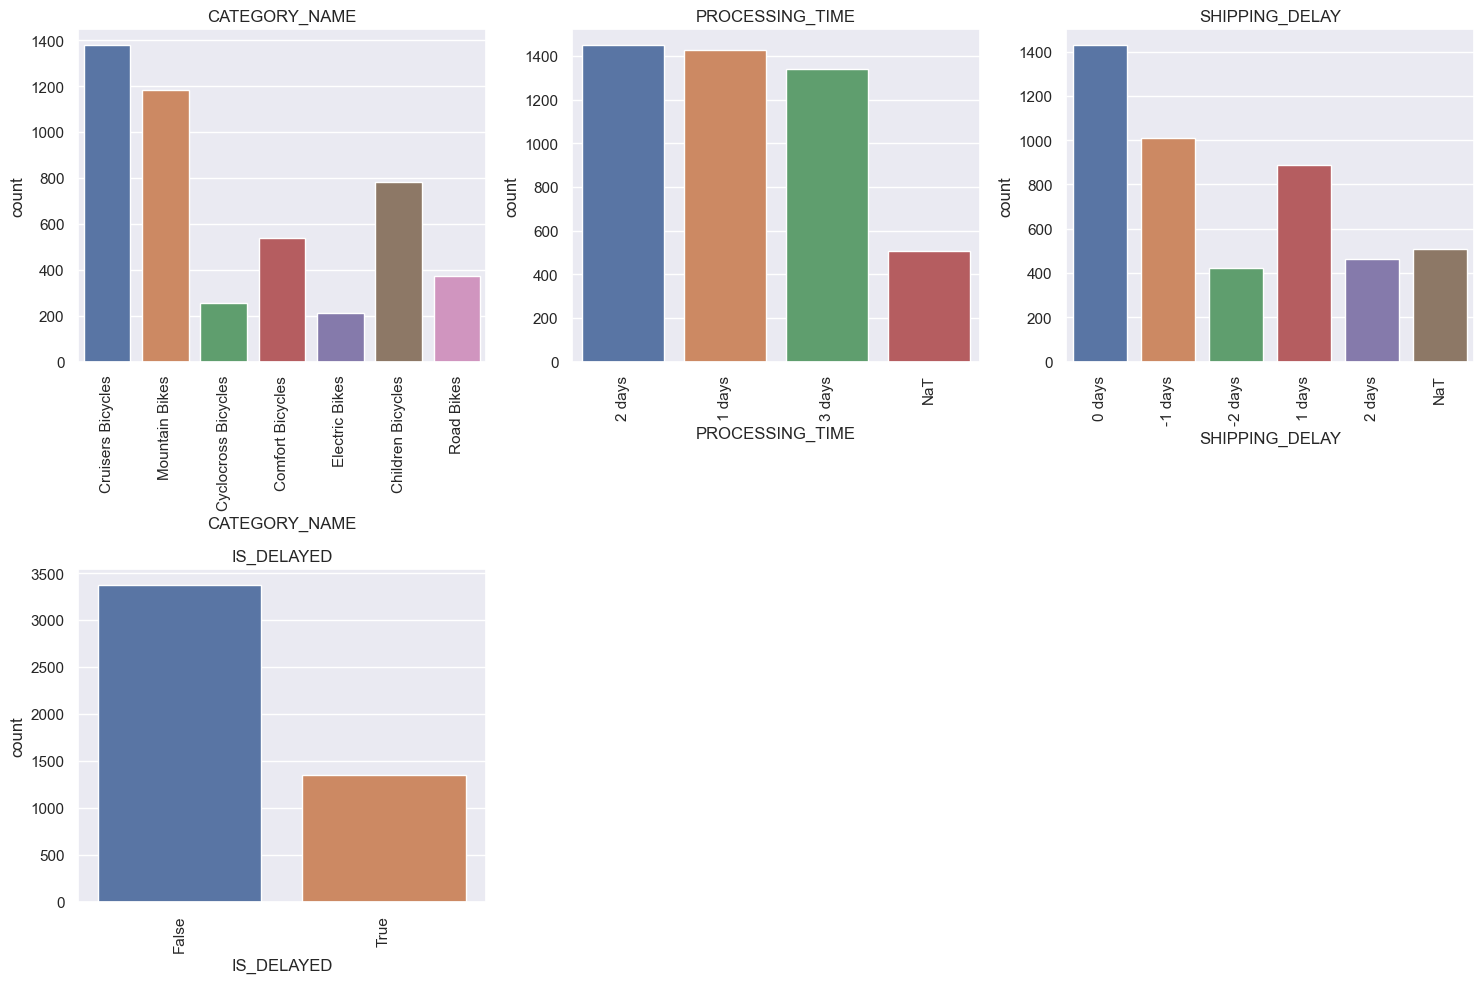

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

plt.savefig('barplot_unique.png', dpi=300)

# Show plot
plt.show()

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="************************************")

import PIL.Image

img = PIL.Image.open("barplot_unique.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the countplot", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The countplot shows the distribution of different categories of bikes, processing time, shipping delay, and whether an order is delayed or not.
> 
> **Key Findings:**
> 
> * **Category:** Cruisers bicycles are the most popular category of bikes, followed by mountain bikes and comfort bicycles.
> * **Processing Time:** The most common processing time is 2 days.
> * **Shipping Delay:** Orders are most frequently delayed by 0 days, followed by -1 days and 1 day. 
> * **Order Delay:**  Most orders are not delayed.
> 
> **Actionable Insights:**
> 
> * **Focus on Popular Categories:**  Since cruisers and mountain bikes are the most popular, consider investing in expanding inventory and marketing efforts for these categories.
> * **Optimize Processing Time:**  The data suggests that a majority of orders take 2 days to process,  which is a good indicator of efficiency. However, investigate the reasons for delays beyond 2 days to identify areas for improvement.
> * **Shipping Delay Management:**  Analyze the reasons for delays in shipping and implement strategies to minimize them.  Consider offering incentives for faster shipping or partnering with more reliable shipping carriers. 
> * **Improve Order Fulfilment:**  Investigate the reasons behind delayed orders. This may involve improving inventory management, order processing procedures, or shipping processes.


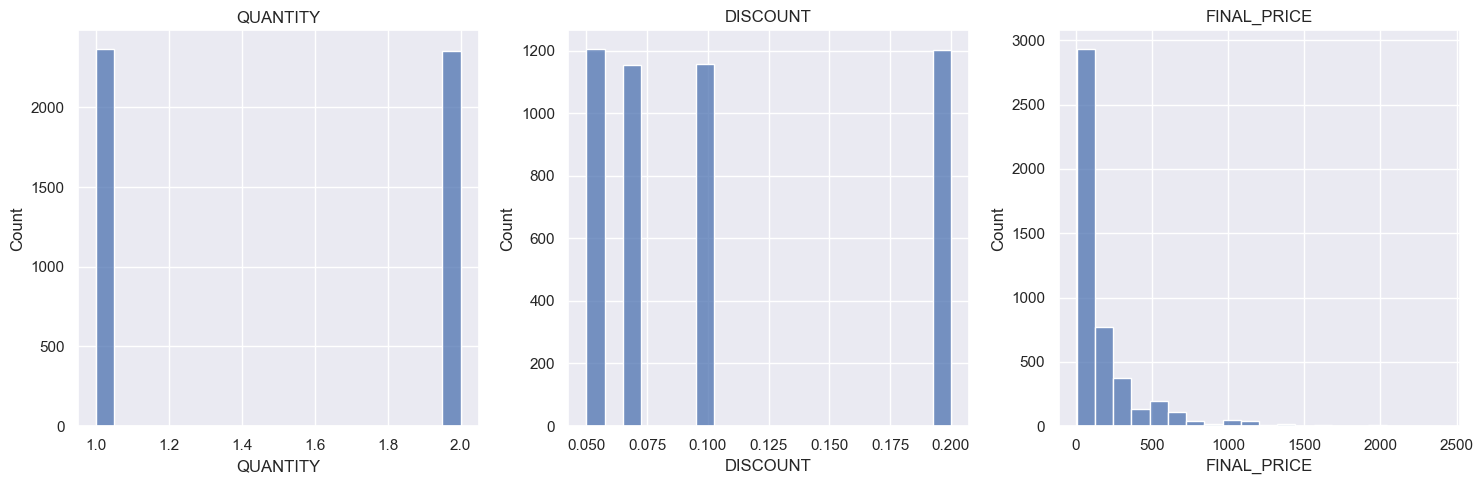

In [ ]:
# Get the names of all columns with data type 'int' and 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram plot for each numeric variable using Seaborn
for i, var in enumerate(num_vars):
    sns.histplot(df[var], ax=axs[i], bins=20, kde=False)  # You can adjust bins and kde
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Save plot to file
plt.savefig('histoplot.png', dpi=300)

# Show plot
plt.show()

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="*************************************")

import PIL.Image

img = PIL.Image.open("histoplot.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the histogramplot", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ##  Analysis of the Histogram Plot
> 
> The histogram plot shows the distribution of three variables: Quantity, Discount, and Final Price. Here's an analysis of each:
> 
> **Quantity:**
> 
> * **Key Finding:** The majority of transactions have a quantity of 2.
> * **Actionable Insight:** This suggests that most customers purchase two items at a time. This information could be used to optimize inventory and pricing strategies. For example, you could consider offering discounts or promotions for buying two items.
> 
> **Discount:**
> 
> * **Key Finding:** Discounts are concentrated around three main values: 0.05, 0.075, and 0.1.
> * **Actionable Insight:** This implies that the company uses a fixed discount strategy with specific discount values. The company could analyze the effectiveness of each discount level and adjust accordingly to maximize profits and customer satisfaction.
> 
> **Final Price:**
> 
> * **Key Finding:** The distribution of Final Price is skewed to the right, indicating that most transactions have a lower final price, with a few transactions having higher prices.
> * **Actionable Insight:** This suggests that the company has a diverse product catalog with a wide range of prices. It's crucial to understand which price points drive the most sales and identify opportunities to increase sales of higher-priced items.
> 
> **Overall:**
> 
> This histogram plot provides a valuable snapshot of the company's sales data. By analyzing these distributions, the company can gain insights into customer behavior, pricing strategies, and inventory management. This information can be used to improve operational efficiency, increase sales, and enhance customer experience.


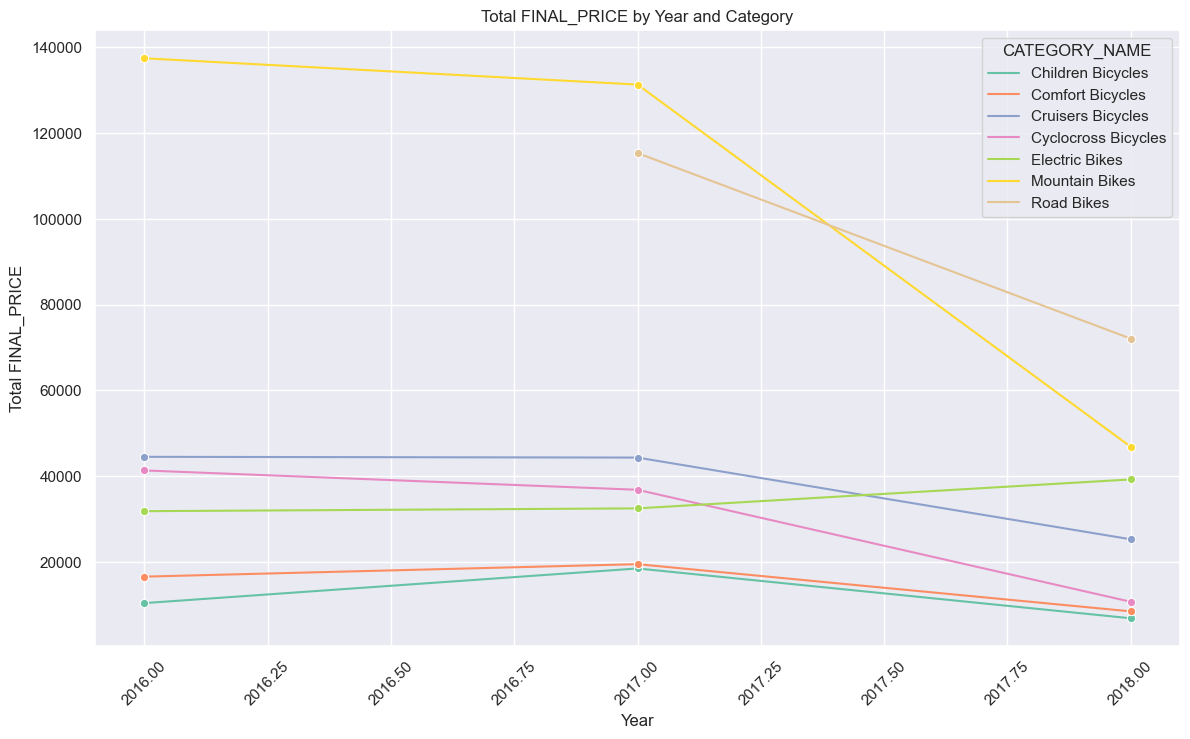

In [ ]:
# Ensure ORDER_DATE is in datetime format
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])

# Extract the Year from ORDER_DATE
df['Year'] = df['ORDER_DATE'].dt.year

# Group by Year and CATEGORY_NAME and calculate the total FINAL_PRICE
yearly_totals = df.groupby(['Year', 'CATEGORY_NAME'])['FINAL_PRICE'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='FINAL_PRICE', hue='CATEGORY_NAME', data=yearly_totals, palette='Set2', marker='o')

plt.title("Total FINAL_PRICE by Year and Category")
plt.xlabel("Year")
plt.ylabel("Total FINAL_PRICE")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save plot to file
plt.savefig('total_price_by_year_category_lineplot.png', dpi=300)

# Show plot
plt.show()

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="************************************")

import PIL.Image

img = PIL.Image.open("total_price_by_year_category_lineplot.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the lineplot", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The lineplot shows the total final price of different bicycle categories over the years. Here are the key findings and actionable insights:
> 
> * **Mountain Bikes** have the highest total final price in 2016 and 2017, indicating a strong demand for this category. 
> * **Road Bikes** have a similar trend to Mountain Bikes, but with a lower price. This suggests a slightly lower demand for Road Bikes compared to Mountain Bikes. 
> * **Cruisers Bikes** have a consistent total final price over the years, suggesting a stable demand for this category.
> * **Comfort Bikes** and **Cyclocross Bikes** have a slightly decreasing total final price over the years, suggesting a possible decline in demand for these categories.
> * **Children Bikes** have a gradual increase in total final price, suggesting a growing demand for children bikes.
> * **Electric Bikes** have a significant increase in total final price, suggesting a rising trend in popularity and demand. 
> 
> **Actionable insights:**
> 
> * **Focus on Mountain Bikes and Road Bikes:** The high demand for these categories presents an opportunity to capitalize on the market. 
> * **Monitor the trend in Comfort Bikes and Cyclocross Bikes:** The declining demand for these categories requires further investigation and potential adjustments in marketing strategies. 
> * **Capitalize on the growing demand for Electric Bikes and Children Bikes:** These categories show promise and potential for growth, making them ideal for expanding product lines and marketing efforts. 
> * **Consider factors influencing the demand:** Investigate market trends, consumer preferences, and competitive landscape to understand the factors driving the demand for different bicycle categories.


## Check the amount of missing value on each column

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the result
print(missing_percentage)

ORDER_DATE         0.0
CATEGORY_NAME      0.0
QUANTITY           0.0
DISCOUNT           0.0
PROCESSING_TIME    0.0
SHIPPING_DELAY     0.0
IS_DELAYED         0.0
FINAL_PRICE        0.0
Year               0.0
dtype: float64


In [ ]:
df.drop(columns ='ORDER_DATE', inplace=True)
df.head()

,CATEGORY_NAME,QUANTITY,DISCOUNT,PROCESSING_TIME,SHIPPING_DELAY,IS_DELAYED,FINAL_PRICE,Year
0,Cruisers Bicycles,1.0,0.20,2 days,0 days,False,119.9980,2016
1,Mountain Bikes,2.0,0.07,2 days,0 days,False,251.9986,2016
2,Cyclocross Bicycles,2.0,0.05,2 days,0 days,False,154.9000,2016
3,Cruisers Bicycles,2.0,0.05,2 days,0 days,False,59.9990,2016
4,Mountain Bikes,1.0,0.20,2 days,0 days,False,579.9980,2016


In [ ]:
# Replace 'NaT' with an empty string in SHIPPING_DELAY
df['SHIPPING_DELAY'] = df['SHIPPING_DELAY'].str.replace(' NaT', '', regex=False)
df['PROCESSING_TIME'] = df['PROCESSING_TIME'].str.replace(' NaT', '', regex=False)

# Remove 'days' from the string values
df['PROCESSING_TIME'] = df['PROCESSING_TIME'].str.replace(' days', '', regex=False)
df['SHIPPING_DELAY'] = df['SHIPPING_DELAY'].str.replace(' days', '', regex=False)

# Drop rows where values are still non-numeric after cleaning
df = df[df['PROCESSING_TIME'].str.isnumeric() & df['SHIPPING_DELAY'].str.isnumeric()]

# Convert the cleaned values to integers
df['PROCESSING_TIME'] = df['PROCESSING_TIME'].astype(int)
df['SHIPPING_DELAY'] = df['SHIPPING_DELAY'].astype(int)

df.head()

,CATEGORY_NAME,QUANTITY,DISCOUNT,PROCESSING_TIME,SHIPPING_DELAY,IS_DELAYED,FINAL_PRICE,Year
0,Cruisers Bicycles,1.0,0.20,2,0,False,119.9980,2016
1,Mountain Bikes,2.0,0.07,2,0,False,251.9986,2016
2,Cyclocross Bicycles,2.0,0.05,2,0,False,154.9000,2016
3,Cruisers Bicycles,2.0,0.05,2,0,False,59.9990,2016
4,Mountain Bikes,1.0,0.20,2,0,False,579.9980,2016


## Label Encoding for each Object datatype

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

CATEGORY_NAME: ['Cruisers Bicycles' 'Mountain Bikes' 'Cyclocross Bicycles'
 'Comfort Bicycles' 'Children Bicycles' 'Electric Bikes' 'Road Bikes']
IS_DELAYED: ['False' 'True']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

CATEGORY_NAME: [2 5 3 1 0 4 6]
IS_DELAYED: [0 1]


## Correlation Heatmap

<Axes: >

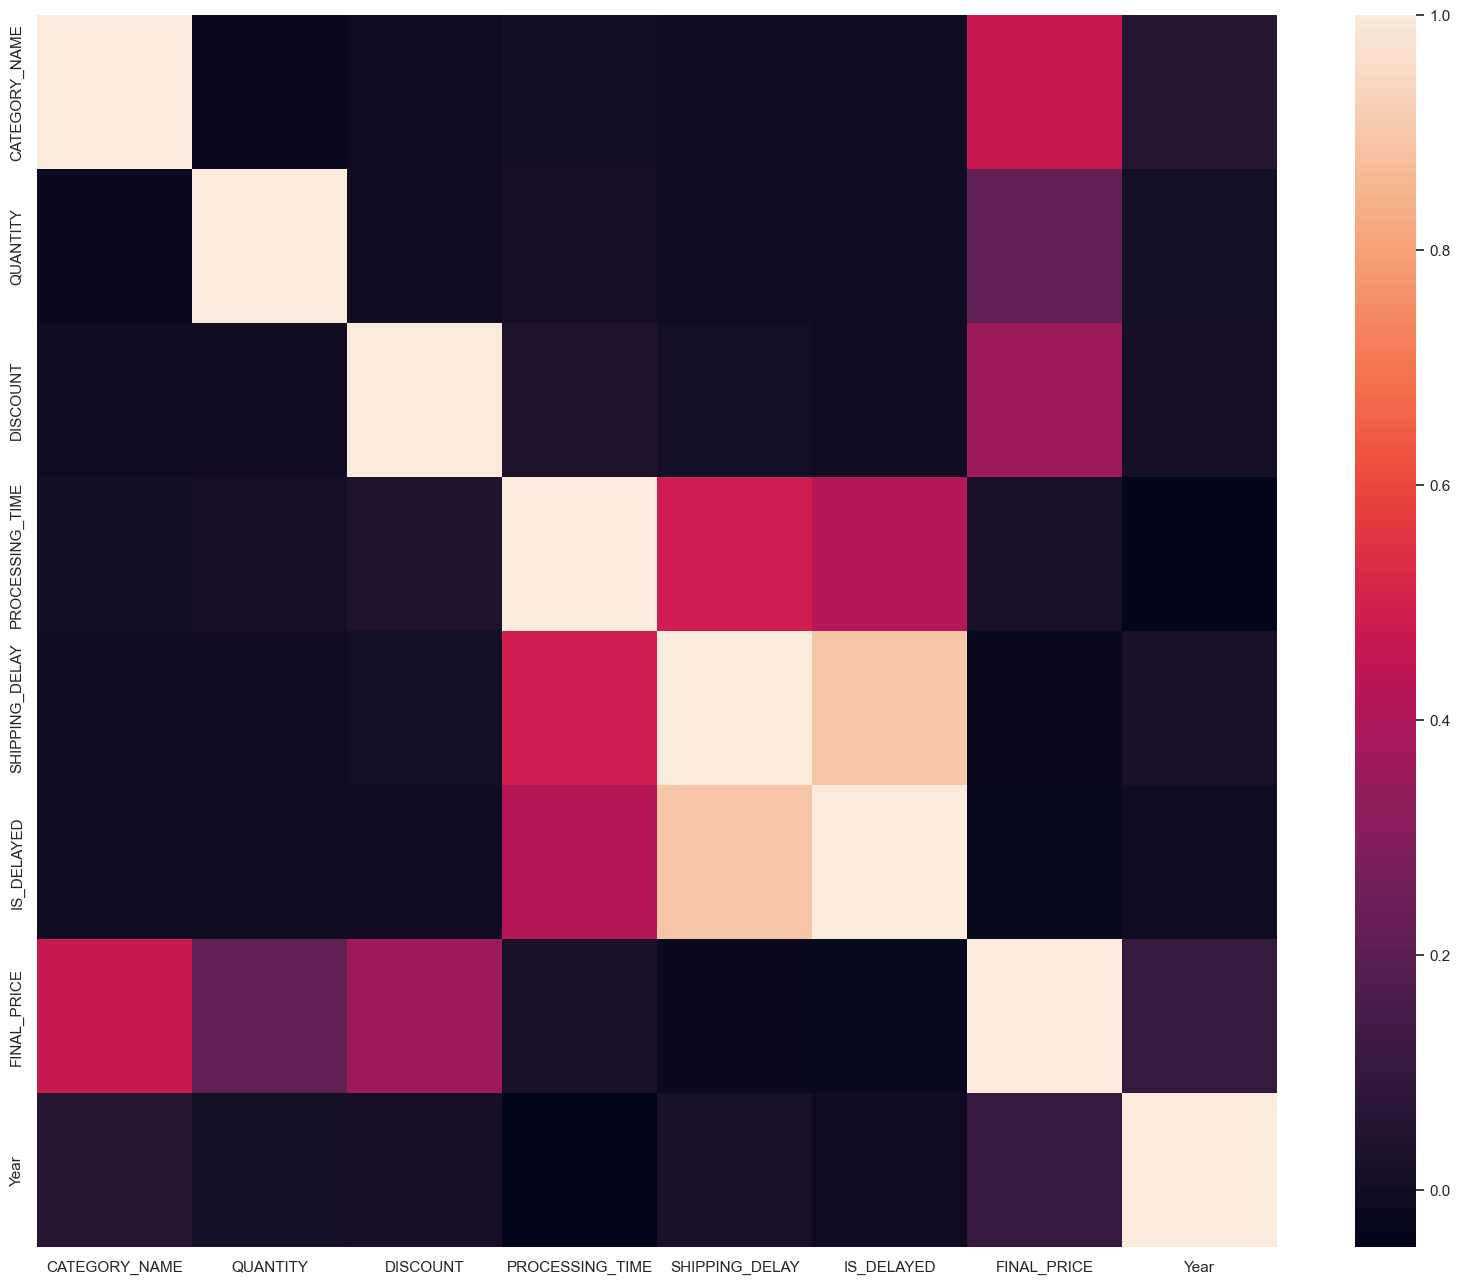

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g')

In [ ]:
# Drop SHIPPING_DELAY column because it have high correlation with IS_DELAYED
df.drop(columns ='SHIPPING_DELAY', inplace=True)
df.head()

,CATEGORY_NAME,QUANTITY,DISCOUNT,PROCESSING_TIME,IS_DELAYED,FINAL_PRICE,Year
0,2,1.0,0.20,2,0,119.9980,2016
1,5,2.0,0.07,2,0,251.9986,2016
2,3,2.0,0.05,2,0,154.9000,2016
3,2,2.0,0.05,2,0,59.9990,2016
4,5,1.0,0.20,2,0,579.9980,2016


## Train Test Split

In [ ]:
X = df.drop('FINAL_PRICE', axis=1)
y = df['FINAL_PRICE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0, max_depth=4, min_samples_leaf=1, min_samples_split=2)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 98.19059916937225
MAPE is 0.642361598026227
MSE is 37323.31803233106
R2 score is 0.5516001928823784
RMSE score is 193.19243782387306


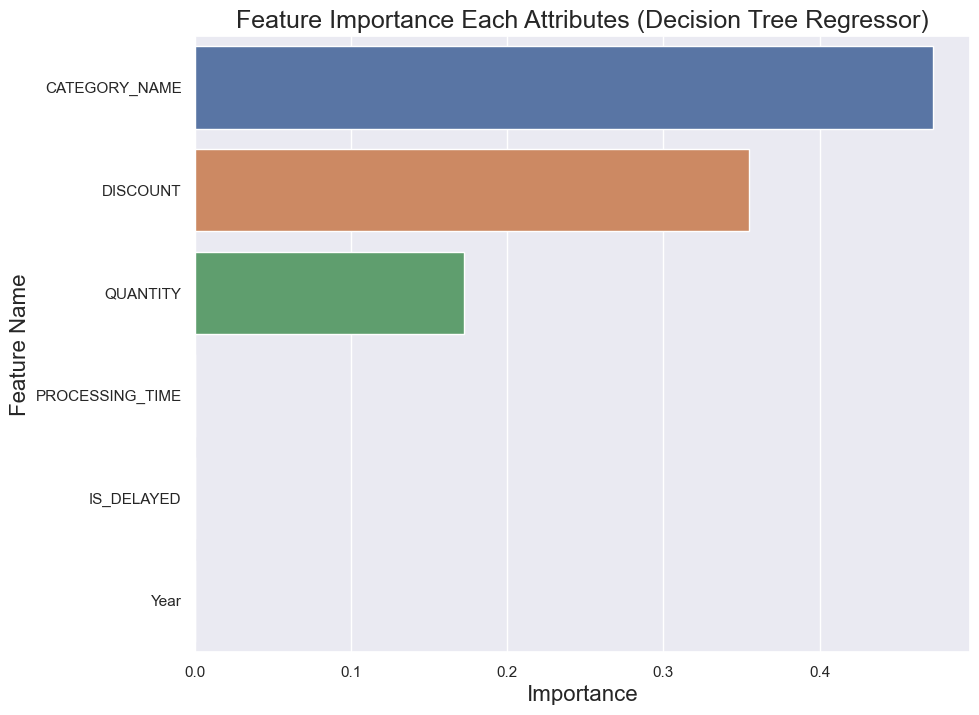

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtr.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.savefig('feature_importance_dtree.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="***********************************")

import PIL.Image

img = PIL.Image.open("feature_importance_dtree.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content([ "Analyze the attached decision tree feature importance.",
        "Explain the key features such as peaks, distributions, and noticeable patterns.",
        "Summarize the main findings and offer actionable insights based on the plot.",img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The decision tree feature importance plot reveals the relative importance of different features in predicting the target variable.
> 
> **Key Features:**
> 
> * **Peaks:** The plot shows two distinct peaks. "CATEGORY_NAME" has the highest importance, followed by "DISCOUNT". These features significantly influence the model's predictions.
> * **Distribution:** The importance scores are distributed with a clear descending trend. "QUANTITY" holds a noticeable importance, while "PROCESSING_TIME" and "IS_DELAYED" have very low importance scores. "Year" has the lowest importance.
> * **Noticeable Patterns:**  The plot highlights a clear distinction between the top three features and the rest. This indicates that the model heavily relies on "CATEGORY_NAME", "DISCOUNT", and "QUANTITY" to make predictions.
> 
> **Main Findings:**
> 
> * The model is highly dependent on categorical information ("CATEGORY_NAME") and discounts ("DISCOUNT") in predicting the target variable.
> * The number of items purchased ("QUANTITY") also plays a significant role, suggesting a potential relationship between the quantity and the target variable. 
> * The other features, including "PROCESSING_TIME", "IS_DELAYED", and "Year", contribute minimally to the model's predictions.
> 
> **Actionable Insights:**
> 
> * Focus on understanding the relationship between "CATEGORY_NAME" and the target variable. Analyze how different categories impact the outcome. 
> * Analyze the impact of discounts on the target variable. Explore whether specific discount strategies contribute to changes in the target variable.
> * Investigate the correlation between "QUANTITY" and the target variable. Determine if there are trends or patterns related to the number of items purchased. 
> * Consider removing features with negligible importance, such as "PROCESSING_TIME", "IS_DELAYED", and "Year", to simplify the model and improve efficiency.  However, ensure their removal does not significantly impact the model's performance. 
> * Explore alternative models or feature engineering techniques to potentially improve the model's ability to utilize less impactful features.

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=7, min_samples_split=10, min_samples_leaf=4)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 87.50003624290859
MAPE is 0.5128752209803061
MSE is 34334.519297840234
R2 score is 0.5875074178214408
RMSE score is 185.29576168342393


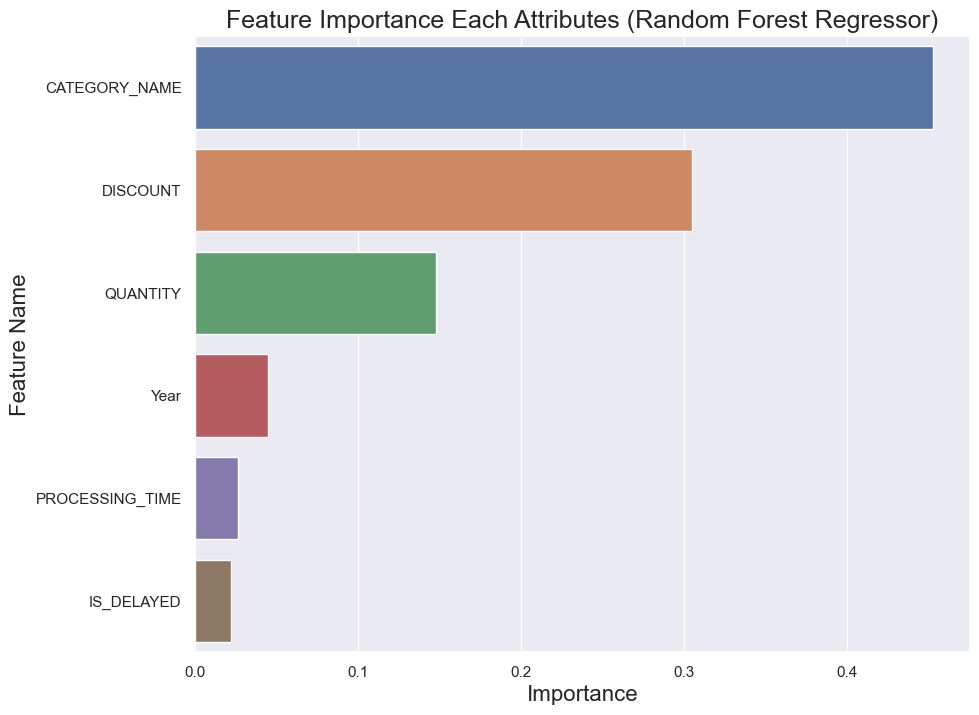

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.savefig('feature_importance_rf.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="*************************************")

import PIL.Image

img = PIL.Image.open("feature_importance_rf.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content([ "Analyze the attached random forest feature importance.",
        "Explain the key features such as peaks, distributions, and noticeable patterns.",
        "Summarize the main findings and offer actionable insights based on the plot.",img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The plot shows the feature importance of each attribute in a random forest regressor model. The importance is measured by the decrease in the Gini impurity of the nodes in the decision tree when the feature is used to split the data.
> 
> **Key Features:**
> 
> * **Peaks:** The plot shows two prominent peaks, with "CATEGORY_NAME" having the highest feature importance and "DISCOUNT" having the second highest. This suggests that these two features are the most important predictors of the target variable.
> * **Distribution:** The importance of the features decreases from left to right, with the top two features having much higher importance than the rest.
> * **Noticeable Patterns:** The features related to the product (CATEGORY_NAME, DISCOUNT, QUANTITY) have a higher importance than the features related to the order (YEAR, PROCESSING_TIME, IS_DELAYED). This suggests that product characteristics are more important predictors than order characteristics.
> 
> **Main Findings:**
> 
> * The random forest model has identified "CATEGORY_NAME" and "DISCOUNT" as the most important features.
> * The features related to product characteristics are more important than those related to order characteristics.
> 
> **Actionable Insights:**
> 
> * **Focus on product characteristics:** The model suggests that product characteristics are more important predictors of the target variable. This means that businesses should focus on strategies that improve product quality, pricing, and availability.
> * **Leverage category information:** The model highlights the importance of category information. Businesses should use this information to understand customer needs and preferences, segment their market, and develop targeted marketing campaigns.
> * **Optimize discounts:** The model indicates that discount is an important factor. Businesses should carefully consider the use of discounts and ensure that they are being used effectively to maximize sales and profits.
> * **Further investigation needed:** It's important to note that the model only provides a general understanding of feature importance. Further investigation is needed to understand the specific relationships between the features and the target variable.
> 
> In conclusion, the feature importance plot provides valuable insights into the factors that influence the target variable. Businesses can use this information to improve their operations, enhance their product offerings, and optimize their marketing strategies.


## Customer Analysis

In [ ]:
query = "SELECT * FROM public.customer_analysis"
df = pd.read_sql_query(query, connection)
df.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_33820\2749190418.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,CUSTOMER_ID,FIRST_NAME,LAST_NAME,TOTAL_ORDERS,TOTAL_SPENT
0,10.0,Pamelia,Newman,11.0,37800.42
1,75.0,Abby,Gamble,7.0,37499.92
2,94.0,Sharyn,Hopkins,10.0,37138.18
3,6.0,Lyndsey,Bean,11.0,35856.83
4,16.0,Emmitt,Sanchez,12.0,34502.70


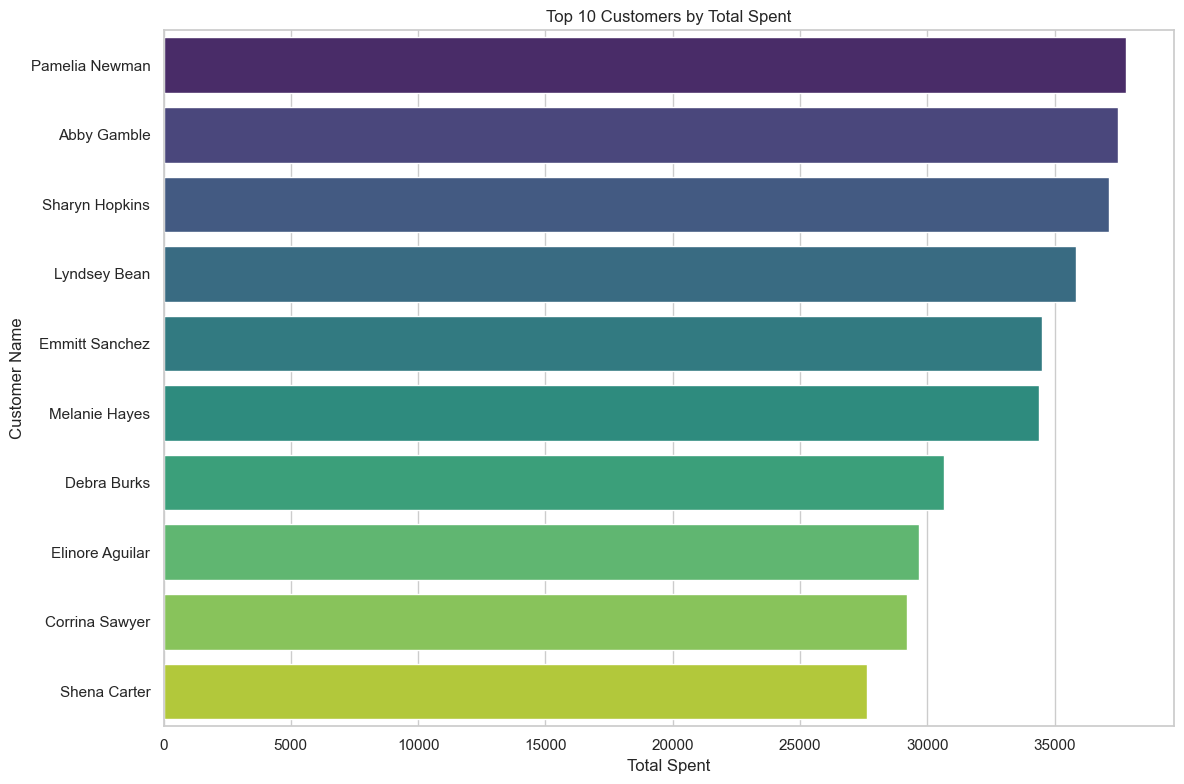

In [ ]:
# Create a new column combining FIRST_NAME and LAST_NAME
df['FULL_NAME'] = df['FIRST_NAME'] + ' ' + df['LAST_NAME']

# Sort the DataFrame by TOTAL_SPENT in descending order and select the top 10 customers
top_customers = df.sort_values(by='TOTAL_SPENT', ascending=False).head(10)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='TOTAL_SPENT', y='FULL_NAME', data=top_customers, palette='viridis')

# Set plot labels and title
plt.xlabel('Total Spent')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Spent')

# Show the plot
plt.tight_layout()
plt.savefig('customer.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="*************************************")

import PIL.Image

img = PIL.Image.open("customer.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content([ "Analyze the attached barplot about top 10 customers by total spent.",
        "Explain the key features such as peaks, distributions, and noticeable patterns.",
        "Summarize the main findings and offer actionable insights based on the plot.",img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The barplot displays the top 10 customers by total spent.
> 
> **Key features:**
> 
> * **Peaks:** The barplot shows a clear peak for Pamela Newman, indicating she is the top customer with the highest total spent.
> * **Distribution:** The bars are distributed in descending order from highest to lowest total spent, which provides a visual representation of customer spending hierarchy.
> * **Noticeable patterns:**  The total spent values for the top 10 customers seem to form a relatively even distribution, with a slight gap between the 1st and 2nd place and a wider gap between the 4th and 5th place. This indicates a group of high-spending customers, followed by a gradual decrease in spending among the remaining top 10.
> 
> **Main findings:**
> 
> * Pamela Newman is the top customer with the highest total spent.
> * There is a significant difference in spending between the top 2 customers and the remaining customers in the top 10.
> * The top 10 customers contribute a substantial amount to the overall revenue.
> 
> **Actionable insights:**
> 
> * **Target Pamela Newman and Abby Gamble:** Implement strategies to retain these high-value customers and encourage repeat purchases.
> * **Loyalty programs for top spenders:** Introduce loyalty programs with rewards or exclusive benefits for customers with high spending, encouraging them to spend more.
> * **Customer segmentation:** Analyze the spending patterns of different customer segments to tailor marketing efforts and offer personalized promotions.
> * **Focus on customer retention:** Implement strategies to reduce churn rates, especially among high-spending customers.
> * **Analyze purchase patterns:** Study the purchase patterns of the top 10 customers to understand their preferences and identify potential opportunities for cross-selling and upselling.


## Employee Performance Analysis

In [ ]:
query = "SELECT * FROM public.staff_performance"
df = pd.read_sql_query(query, connection)
df.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_33820\1488935613.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,STAFF_ID,FIRST_NAME,LAST_NAME,ORDERS_PROCESSED,TOTAL_SALES
0,6.0,Marcelene,Boyer,1615.0,2938888.73
1,7.0,Venita,Daniel,1580.0,2887353.48
2,3.0,Genna,Serrano,544.0,952722.26
3,2.0,Mireya,Copeland,462.0,837423.65
4,8.0,Kali,Vargas,269.0,516695.17


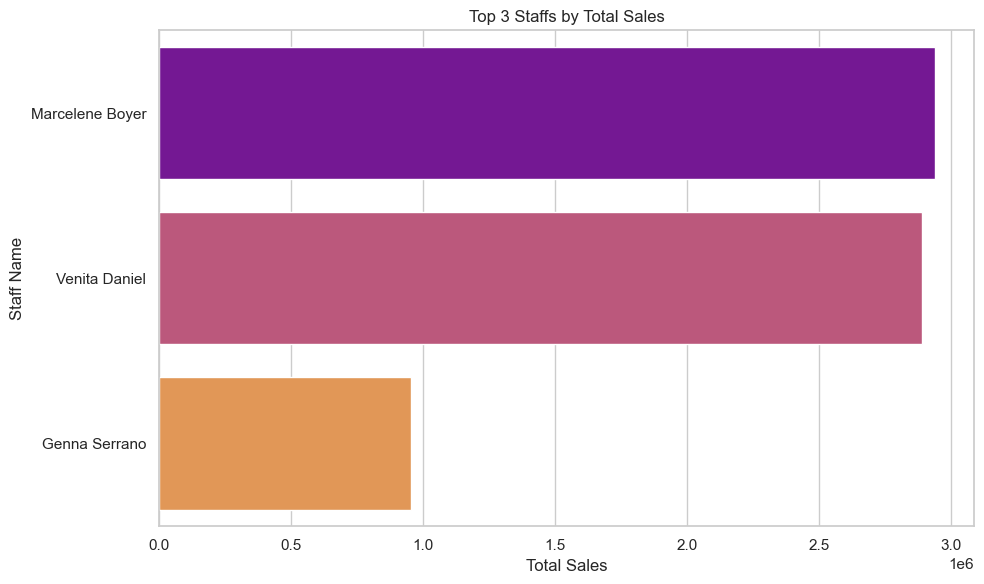

In [ ]:
# Create a new column combining FIRST_NAME and LAST_NAME
df['FULL_NAME'] = df['FIRST_NAME'] + ' ' + df['LAST_NAME']

# Sort the DataFrame by TOTAL_SALES in descending order and select the top 3 employees
top_employees = df.sort_values(by='TOTAL_SALES', ascending=False).head(3)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TOTAL_SALES', y='FULL_NAME', data=top_employees, palette='plasma')

# Set plot labels and title
plt.xlabel('Total Sales')
plt.ylabel('Staff Name')
plt.title('Top 3 Staffs by Total Sales')

# Show the plot
plt.tight_layout()
plt.savefig('staff.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="********************************")

import PIL.Image

img = PIL.Image.open("staff.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content([ "Analyze the attached barplot about top 3 staffs by total bicycle sales in dollars.",
        "Explain the key features such as peaks, distributions, and noticeable patterns.",
        "Summarize the main findings and offer actionable insights based on the plot.",img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The barplot displays the total sales in dollars by the top three staff members.  
> 
> **Key Features:**
> 
> * **Peaks:** The barplot has one clear peak, representing the highest total sales, which belongs to Marcelene Boyer. This indicates that Marcelene Boyer has generated the most revenue compared to the other two staff members.
> * **Distribution:** The barplot shows a decreasing trend from the highest sales to the lowest sales.  
> * **Noticeable Patterns:** The sales of Venita Daniel are significantly higher than those of Genna Serrano, who is significantly lower in comparison to the other two staff members.
> 
> **Main Findings:**
> 
> *  Marcelene Boyer is the top-performing staff member with the highest total sales.
> * Venita Daniel also shows strong performance, generating significantly higher sales than Genna Serrano. 
> * Genna Serrano has the lowest sales among the top three staff members.
> 
> **Actionable Insights:**
> 
> * **Focus on High Performers:** Recognizing the contributions of top performers like Marcelene Boyer and Venita Daniel is crucial. Offer incentives, training, or opportunities to further motivate their efforts. 
> * **Identify Areas for Improvement:** Explore reasons for Genna Serrano's lower sales performance. Investigate factors such as training needs, product knowledge, customer interaction skills, or any potential barriers to achieving higher sales.  
> * **Training and Development:** Consider investing in training programs to enhance sales skills across the team. Focus on customer engagement strategies, product knowledge, and effective communication techniques to boost sales performance. 
> * **Performance Monitoring:** Regularly track and monitor staff performance to identify trends and areas for improvement. This ongoing analysis can help identify potential issues early and provide timely support. 


## Stocks Analysis

In [ ]:
query = "SELECT * FROM public.stock_levels"
df = pd.read_sql_query(query, connection)
df.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_33820\1454996078.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,STORE_NAME,PRODUCT_NAME,QUANTITY
0,Baldwin Bikes,Electra Amsterdam Fashion 3i Ladies' - 2017/2018,5.0
1,Baldwin Bikes,Electra Amsterdam Fashion 7i Ladies' - 2017,19.0
2,Baldwin Bikes,Electra Amsterdam Original 3i - 2015/2017,6.0
3,Baldwin Bikes,Electra Amsterdam Original 3i Ladies' - 2017,4.0
4,Baldwin Bikes,Electra Amsterdam Royal 8i - 2017/2018,10.0


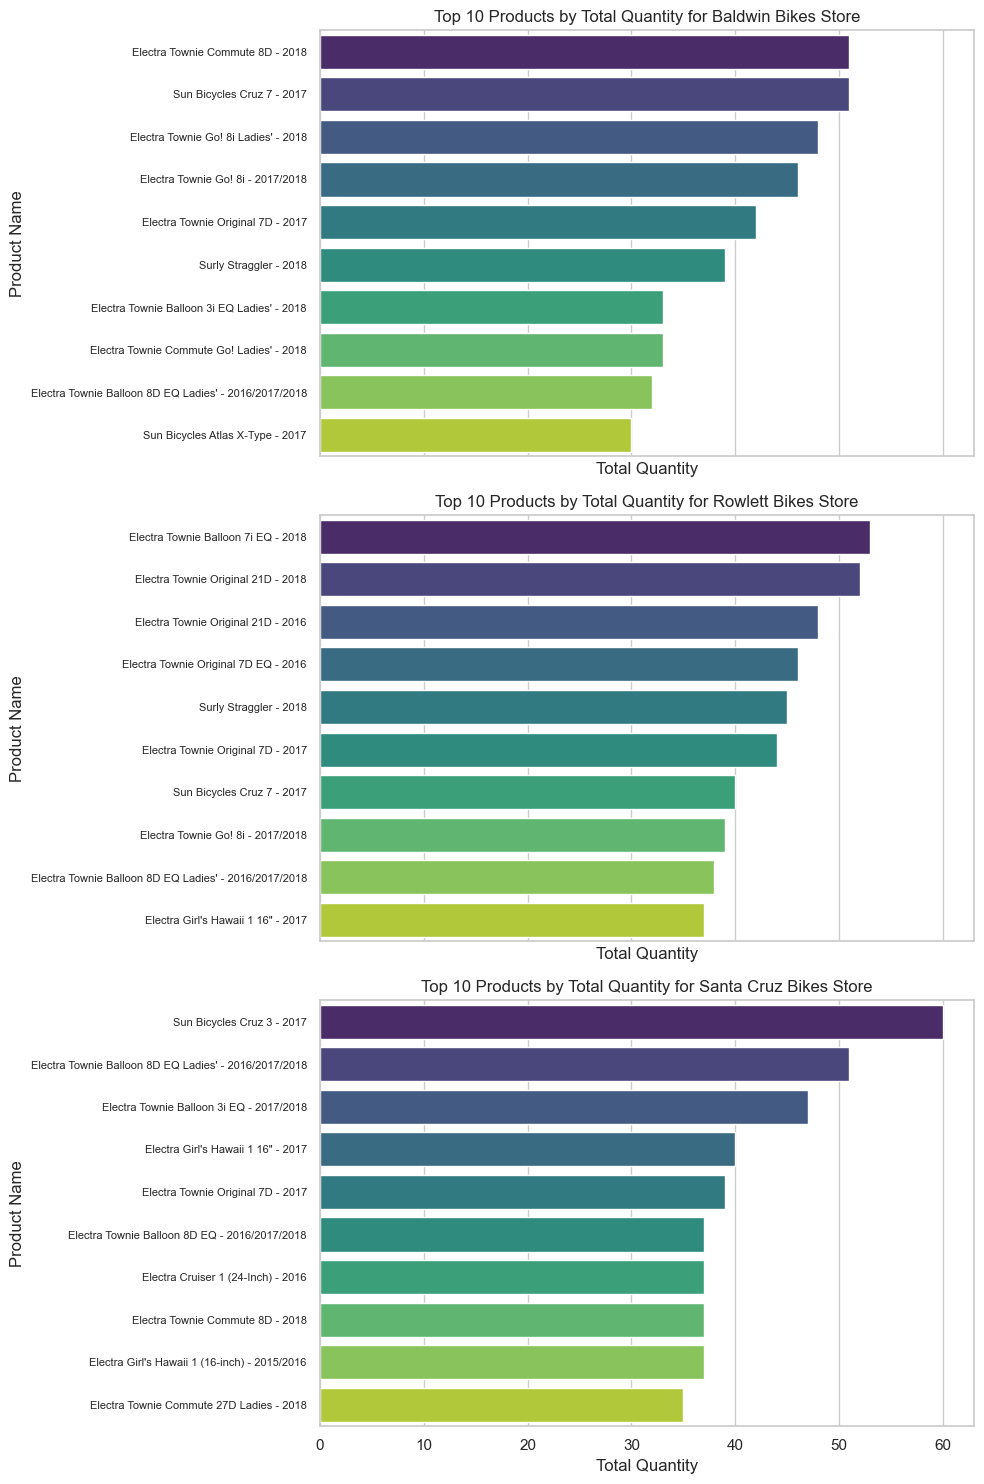

Combined plot saved successfully.


In [ ]:
# Aggregate total quantity by product and store
aggregated_df = df.groupby(['STORE_NAME', 'PRODUCT_NAME']).agg({'QUANTITY': 'sum'}).reset_index()

# Create a dictionary to store top 10 products by total quantity for each store
top_10_products_by_store = {}
for store in aggregated_df['STORE_NAME'].unique():
    store_df = aggregated_df[aggregated_df['STORE_NAME'] == store]
    top_10_products = store_df.sort_values(by='QUANTITY', ascending=False).head(10)
    top_10_products_by_store[store] = top_10_products

# Create a figure with 3 rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

# Flatten axes array if needed
axes = axes.flatten()

# Plotting
for ax, (store, data) in zip(axes, top_10_products_by_store.items()):
    sns.barplot(x='QUANTITY', y='PRODUCT_NAME', data=data, palette='viridis', ax=ax)
    ax.set_xlabel('Total Quantity')
    ax.set_ylabel('Product Name')
    ax.set_title(f'Top 10 Products by Total Quantity for {store} Store')
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.savefig('top_10_products_combined.png', dpi=300)
plt.show()

print("Combined plot saved successfully.")

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="****************************")

import PIL.Image

img = PIL.Image.open("top_10_products_combined.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content([ "Analyze each attached barplot about top 10 products that have most stocks from the 3 stores",
        "Explain the key features such as peaks, distributions, and noticeable patterns.",
        "Summarize the main findings and offer actionable insights based on the plot.",img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Analysis of Top 10 Products by Total Quantity for Each Bike Store
> 
> The barplots visualize the top 10 products with the highest stock quantities in each of the three bike stores: Baldwin Bikes, Rowlett Bikes, and Santa Cruz Bikes.  Let's break down the key features and insights for each store:
> 
> **Baldwin Bikes**
> 
> * **Peaks:** The top two products, "Electra Townie Commute 8D - 2018" and "Sun Bicycles Cruz 7 - 2017," have the highest stock quantities, with "Electra Townie Commute 8D - 2018" having slightly more inventory.
> * **Distribution:**  There's a clear downward trend in the bar heights, indicating a significant drop in stock levels as we move down the list. The stock quantities are generally higher for products in the top 5.
> * **Notable Patterns:** There's a mix of Electra Townie models, Sun Bicycles, and a single "Surly Straggler" product. Electra Townie models seem to dominate the top spots.
> 
> **Rowlett Bikes**
> 
> * **Peaks:** The top two products are "Electra Townie Balloon 7i EQ - 2018" and "Electra Townie Original 21D - 2018,"  showing a higher stock quantity compared to other products.
> * **Distribution:** The distribution is similar to Baldwin Bikes, with a sharp decrease in stock quantity from the top spots down. 
> * **Notable Patterns:**  Again, Electra Townie models are prevalent, with a noticeable focus on "Balloon" models and a few "Original" models.
> 
> **Santa Cruz Bikes**
> 
> * **Peaks:**  "Sun Bicycles Cruz 3 - 2017" has the highest stock quantity, significantly higher than the second-placed product, "Electra Townie Balloon 8D EQ Ladies' - 2016/2017/2018."
> * **Distribution:** The distribution shows a slightly less steep decline compared to the other two stores, with some products having relatively closer stock quantities.
> * **Notable Patterns:** While Electra Townie models are still present, Sun Bicycles products seem to have a strong presence in Santa Cruz Bikes, with two of the top three positions occupied by Sun Bicycles models.
> 
> **Summary and Actionable Insights**
> 
> The analysis reveals a few key findings:
> 
> * **Electra Townie models are consistently popular across all three stores.**  Focus on maintaining adequate stock levels for this brand to meet customer demand.
> * **Baldwin Bikes and Rowlett Bikes have a steeper decline in stock quantities for the top 10 products compared to Santa Cruz Bikes.**  This indicates a potential need for more diversified inventory to cater to a wider range of customer preferences in those stores.
> * **Santa Cruz Bikes has a distinct preference for Sun Bicycles, suggesting a strong customer base for this brand in that location.**  Consider leveraging this insight to potentially offer exclusive deals or promotions for Sun Bicycles products in Santa Cruz.
> 
> **Actionable Insights:**
> 
> * **Inventory Management:** Optimize inventory levels for each store based on the specific product popularity observed.
> * **Marketing and Promotion:** Utilize the insights gained to target specific products and brands for promotions and campaigns in each store.
> * **Product Analysis:**  Further investigate the differences in product popularity between stores to understand the underlying reasons and potentially tailor product offerings accordingly. 


## Power BI Dashboard Analysis

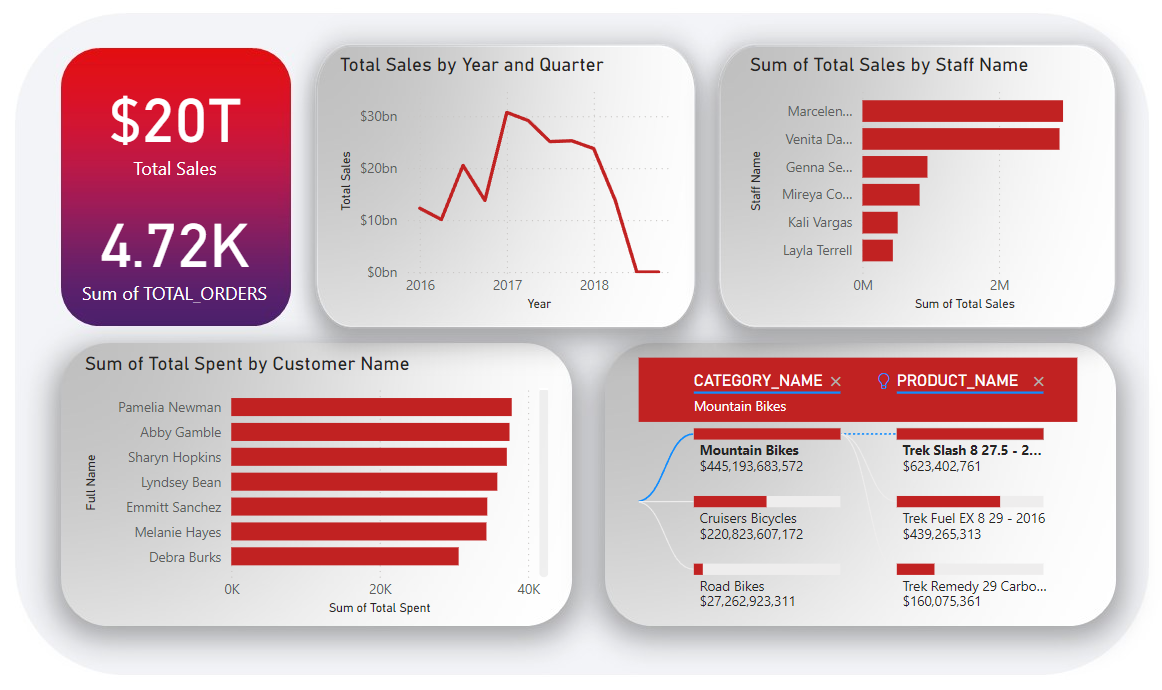

In [ ]:
from IPython.display import Image, display

# Display the image
display(Image(filename='dashboard2.PNG'))

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="****************************************")

import PIL.Image

img = PIL.Image.open("dashboard2.PNG")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content([ "Analyze the attached Power BI Dashboard about Bicycle Sales and Employee Analysis",
        "Explain the key features such as peaks, distributions, and noticeable patterns.",
        "Summarize the main findings and offer actionable insights based on the plot.", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Analysis of the Bicycle Sales and Employee Analysis Power BI Dashboard
> 
> The Power BI dashboard presents a comprehensive overview of bicycle sales performance, focusing on total sales, customer spending, and employee performance.
> 
> **Key Features:**
> 
> * **Total Sales:** The dashboard highlights a total sales figure of $20 Billion and 4.72K total orders, indicating a strong overall sales performance.
> * **Sales by Year and Quarter:** This line chart demonstrates a clear upward trend in sales, peaking in the third quarter of 2017, followed by a steady decline in 2018. The peak in 2017 suggests a successful marketing campaign or seasonal spike in demand. The subsequent decline indicates potential issues to investigate, such as changing market trends, competitor activity, or internal operational challenges.
> * **Sum of Total Sales by Staff Name:** The bar chart reveals significant variation in individual sales performance. Marcelena and Venita contribute the most to overall sales. This data can be utilized for performance evaluation, incentive programs, and identifying top performers for mentorship or leadership opportunities.
> * **Sum of Total Spent by Customer Name:** The bar chart displays the top customer spenders, with Pamela Newman being the highest-spending customer. This information can be utilized for targeted marketing campaigns, loyalty programs, and personalized offers to retain high-value customers.
> * **Category and Product Analysis:** The dashboard showcases the top-selling bicycle categories and products. Mountain bikes are the best-selling category with Trek Slash 8 27.5 being the most popular product. This information can guide inventory management, product development, and marketing strategies.
> 
> **Main Findings:**
> 
> * The company achieved significant sales success in 2017, but experienced a decline in 2018.
> * There is a clear difference in sales performance among employees, with some individuals contributing significantly more than others.
> * Mountain bikes represent the most popular category, with specific products like Trek Slash 8 27.5 achieving high sales figures.
> 
> **Actionable Insights:**
> 
> * **Investigate the decline in sales in 2018:** Conduct a thorough analysis of market trends, competitor activity, and internal factors to understand the reasons behind the decline and develop strategies to improve sales performance.
> * **Focus on employee development:** Provide training and mentorship opportunities to employees, particularly those with lower sales figures, to improve their skills and boost overall performance.
> * **Capitalize on top performers:** Recognize and reward top performers, such as Marcelena and Venita, to maintain their motivation and boost team morale.
> * **Target high-value customers:** Implement loyalty programs and personalized offers to retain and increase spending from top customers, like Pamela Newman.
> * **Optimize product strategy:** Based on the high demand for mountain bikes, consider expanding product offerings in this category or introducing new models to capitalize on the trend.
> 
> By implementing these actionable insights, the company can leverage its strong foundation and address areas for improvement to achieve sustainable growth and success in the bicycle market.
